In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [19]:
import sklearn as sk
from sklearn.datasets import fetch_california_housing

In [20]:
data = fetch_california_housing()
X_raw = data.data
Y = data.target.reshape(-1, 1)
scaler  = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

In [21]:
print(data.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [22]:
def grad(X, Y, Q):
    H = X @ Q
    return (X.T @ (H - Y))/X.shape[0]
m = X_scaled.shape[0]
ones = np.ones((m, 1))
X = np.hstack([ones, X_scaled])
Q = np.zeros((X.shape[1], 1))
a = 1e-3
iters = 50000
i = 0
Qz = [0 + 0j]
while(i < iters):
    Q = Q - a*grad(X, Y, Q)
    zn = Q[0, 0] + Q[1, 0]*1j
    Qz.append(zn)
    if(zn - Qz[len(Qz) - 2] < 0):
        break;
    i += 1
print(i)

30398


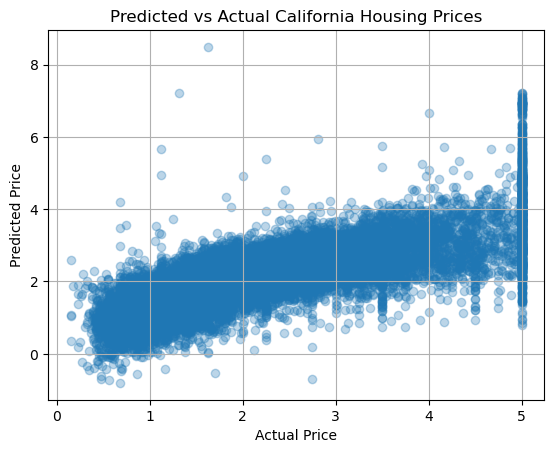

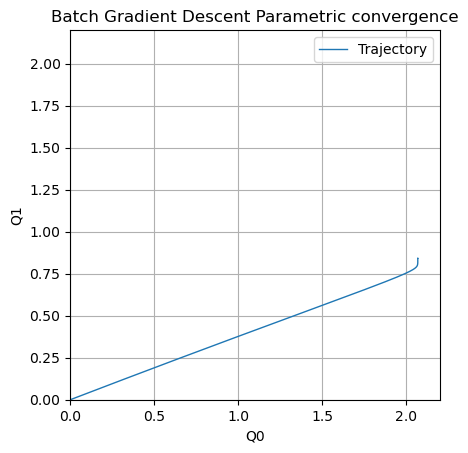

2.0685581690889183
0.8433253515943571
0.13280429758843312
-0.26994511349050954
0.29990457147530813
0.0004312418089421534
-0.04080725773129224
-0.7845756082981383
-0.7557871848595996


In [23]:
df = pd.DataFrame(Qz, columns = ["Z"])
df["Re"] = df["Z"].apply(lambda x: x.real)
df["Im"] = df["Z"].apply(lambda x: x.imag)
H = X @ Q
plt.scatter(Y, H, alpha=0.3)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual California Housing Prices")
plt.grid(True)
plt.show()
plt.plot(df["Re"], df["Im"], label="Trajectory", linewidth=1)
plt.xlabel("Q0")
plt.ylabel("Q1")
plt.title("Batch Gradient Descent Parametric convergence")
plt.xlim([0, 2.2])
plt.ylim([0, 2.2])
plt.gca().set_aspect('equal')
plt.grid(True)
plt.legend()
plt.show()
k = 0
while(k < X.shape[1]):
    print(Q[k, 0])
    k += 1
#Uncomment the below lines to check closeness with analytically computed values.

#theta = np.linalg.inv(X.T @ X) @ X.T @ Y
#k = 0
#while(k < X.shape[1]):
#    print(theta[k, 0])
#    k += 1